In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [3]:
import tensorflow as tf
from tensorflow import keras

### We have 5 Dataset Of Students Who Have Attempted Pre Course Test 

In [128]:
bcaa = pd.read_csv("OS UNIX.LINUX-Pre-Course Assessment _III BCA A.csv")
bcab = pd.read_excel("OS UNIX.LINUX-Precourse Assessment - III BCA_B.xlsx")
bcac = pd.read_excel("OS UNIX.LINUX-Pre-Course _III BCA_C.xlsx")
bcad = pd.read_excel("III BCA D OS_Precourse.xlsx")
bcae = pd.read_csv("OS UNIX.LINUX-Pre-Course Assessment _III BCA A.csv")

In [129]:
bcad.head()

,Surname,First name,Email address,State,Started on,Completed,Time taken,Grade/10.00,Q. 1 /1.00,Q. 2 /1.00,Q. 3 /1.00,Q. 4 /1.00,Q. 5 /1.00,Q. 6 /1.00,Q. 7 /1.00,Q. 8 /1.00,Q. 9 /1.00,Q. 10 /1.00
0,BCA2020,mannaanncheriyan,bca20cs1a4191@kristujayanti.com,Finished,2021-08-24 11:34:00,2021-08-24 11:36:00,2 mins 11 secs,5.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
1,BCA2020,akhilvenkatreddym,bca20cs1h4202@kristujayanti.com,Finished,2021-08-24 11:34:00,2021-08-24 11:36:00,1 min 49 secs,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,BCA2020,haroormohamedrayan,bca20cs1h4205@kristujayanti.com,Finished,2021-08-24 11:34:00,2021-08-24 11:38:00,4 mins 6 secs,9.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,BCA2020,anushak,bca20cs1k4221@kristujayanti.com,Finished,2021-08-24 11:34:00,2021-08-24 11:41:00,6 mins 47 secs,8.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
4,BCA2020,mathewsmroy,bca20cs1h4210@kristujayanti.com,Finished,2021-08-24 11:34:00,2021-08-24 11:38:00,4 mins 1 sec,7.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0


In [130]:
frame = [bcaa,bcab,bcac,bcad,bcae]

In [131]:
dataset = pd.concat(frame)

In [132]:
dataset.shape

(266, 18)

In [133]:
dataset['State'].value_counts()
# Their Is a Person Who Attempted But Did not Submit Result So He Can Be Discarded

Finished           264
Never submitted      1
Name: State, dtype: int64

In [134]:
dataset = dataset[dataset['State']  == "Finished"]

### Now All Student Are Finishing The Test So 'State' Column is Not Required

### 'Surname' column is not required

### Since We Have 'Time Taken' Column 'Started On' and 'Completed' is also not required 

In [135]:
remove = dataset.pop("State")
remove = dataset.pop("Surname")
remove = dataset.pop("Started on")
remove = dataset.pop("Completed")

In [136]:
dataset.shape

(264, 14)

In [137]:
dataset.describe()

,Grade/10.00,Q. 1 /1.00,Q. 2 /1.00,Q. 3 /1.00,Q. 4 /1.00,Q. 5 /1.00,Q. 6 /1.00,Q. 7 /1.00,Q. 8 /1.00,Q. 9 /1.00,Q. 10 /1.00
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,6.916667,0.727273,0.655303,0.712121,0.696970,0.647727,0.791667,0.738636,0.575758,0.704545,0.666667
std,2.048988,0.446208,0.476172,0.453634,0.460441,0.478586,0.406888,0.440212,0.495166,0.457113,0.472300
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Grade Allotment
### Their Are 10 Question Of Which 4 are Average Level , 3 are Easy And 3 are Hard 

Q1,Q2,Q3,Q4 are Average 

Q5,Q6,Q7 are Easy

Q8,Q9,Q10 are Hard

Weights

Avg - 0.5

Easy - 0.3

Hard  - 0.9


In [138]:
def Standard_Time(ds,c_name,conversion = "seconds"):
    convertedtime = []
    if conversion == "seconds":
        for time in ds[c_name]:
            val = [int(s) for s in time.split() if s.isdigit()]
            # if len(val) == 4:
            #     n_time = val[0]*60 +val[1]
            # else:
            #     if "secs" in val:
            #         n_time = val[0]*60 
                    
            try:
                n_time = val[0]*60 +val[1]
                
            except IndexError as Ie:
                n_time = val[0]
            
            convertedtime.append(n_time)
        ds['ConvertedTime'] = np.array(convertedtime)
        
    
    

In [139]:
Standard_Time(dataset,"Time taken")

### Now Time Is Standardized For Comparision in Seconds

In [140]:
dataset['ConvertedTime'].describe()

count     264.000000
mean      295.117424
std       168.449396
min         3.000000
25%       159.000000
50%       273.000000
75%       396.500000
max      1095.000000
Name: ConvertedTime, dtype: float64

In [17]:
kmeans = KMeans(n_clusters=3, random_state=0)
dataset['cluster'] = kmeans.fit_predict(dataset[['ConvertedTime']])# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
## add to dataset
dataset['cen_x'] = dataset.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
dataset['c'] = dataset.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

<AxesSubplot:xlabel='Email address', ylabel='ConvertedTime'>

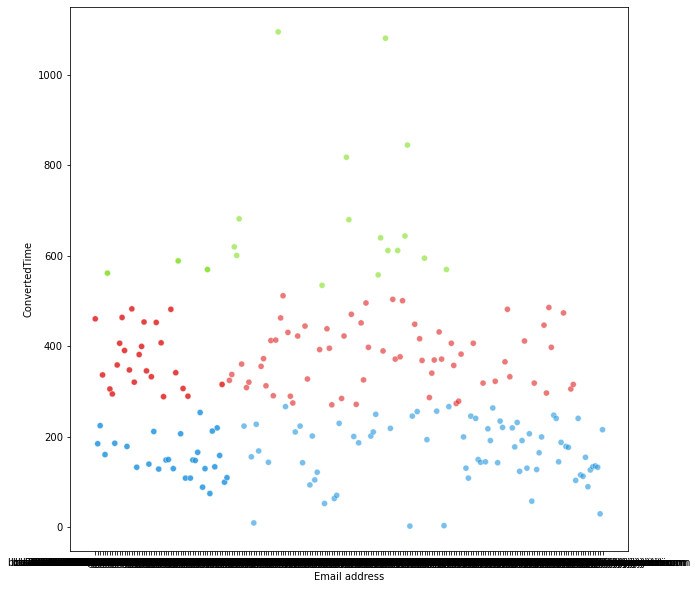

In [18]:
plt.figure(figsize=(10,10))
sb.scatterplot(data = dataset ,x ='Email address', y= 'ConvertedTime', c=dataset['c'], alpha = 0.6)

In [19]:
dataset = dataset.drop(['cen_x','c','cluster'], axis = 1)

Time Taken To completed

Blue - Fastest

Red - Average

Green  -Slowest

In [141]:
dataset.pop("Time taken")

0     7 mins 41 secs
1      3 mins 5 secs
2     3 mins 45 secs
3     5 mins 37 secs
4     2 mins 41 secs
           ...      
50    3 mins 40 secs
51    2 mins 39 secs
52    5 mins 16 secs
53     1 min 40 secs
54     1 min 50 secs
Name: Time taken, Length: 264, dtype: object

### Adding Weights To The Questions

## Grade Allotment
### Their Are 10 Question Of Which 4 are Average Level , 3 are Easy And 3 are Hard 

Q1,Q2,Q3,Q4 are Average 

Q5,Q6,Q7 are Easy

Q8,Q9,Q10 are Hard

Weights

Avg - 0.5

Easy - 0.3

Hard  - 0.9


In [143]:
dataset.head()

,First name,Email address,Grade/10.00,Q. 1 /1.00,Q. 2 /1.00,Q. 3 /1.00,Q. 4 /1.00,Q. 5 /1.00,Q. 6 /1.00,Q. 7 /1.00,Q. 8 /1.00,Q. 9 /1.00,Q. 10 /1.00,ConvertedTime
0,ankitpareek,bca20cs1a1004@kristujayanti.com,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,461
1,roshandahal,bca20cs1a1020@kristujayanti.com,7.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,185
2,velayuthams,bca20cs1a1024@kristujayanti.com,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,225
3,arijitkumbhakar,bca20cs1a1007@kristujayanti.com,9.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,337
4,shubhambarnwal,bca20cs1a1021@kristujayanti.com,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,161


In [144]:
dataset.rename(columns={"Q. 1 /1.00":"q1",
                        "Q. 2 /1.00":"q2",
                        "Q. 3 /1.00":"q3",
                        "Q. 4 /1.00":"q4",
                        "Q. 5 /1.00":"q5",
                        "Q. 6 /1.00":"q6",
                        "Q. 7 /1.00":"q7",
                        "Q. 8 /1.00":"q8",
                        "Q. 9 /1.00":"q9",
                        "Q. 10 /1.00":"q10"
                        },inplace=True)

In [146]:
dataset [["q1","q2","q3","q4"]] = dataset[["q1","q2","q3","q4"]]*0.5
dataset [["q5","q6","q7"]] = dataset[["q5","q6","q7"]]*0.3
dataset[["q8","q9","q10"]] = dataset[["q8","q9","q10"]]*0.9
dataset

,First name,Email address,Grade/10.00,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,ConvertedTime
0,ankitpareek,bca20cs1a1004@kristujayanti.com,10.0,0.5,0.5,0.5,0.5,0.3,0.3,0.3,0.9,0.9,0.9,461
1,roshandahal,bca20cs1a1020@kristujayanti.com,7.0,0.5,0.5,0.5,0.0,0.3,0.0,0.3,0.0,0.9,0.9,185
2,velayuthams,bca20cs1a1024@kristujayanti.com,10.0,0.5,0.5,0.5,0.5,0.3,0.3,0.3,0.9,0.9,0.9,225
3,arijitkumbhakar,bca20cs1a1007@kristujayanti.com,9.0,0.5,0.5,0.0,0.5,0.3,0.3,0.3,0.9,0.9,0.9,337
4,shubhambarnwal,bca20cs1a1021@kristujayanti.com,10.0,0.5,0.5,0.5,0.5,0.3,0.3,0.3,0.9,0.9,0.9,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,krithikam,bca20cs1k1050@kristujayanti.com,4.0,0.5,0.0,0.5,0.5,0.3,0.0,0.0,0.0,0.0,0.0,220
51,nandhikasrig,bca20cs1k1053@kristujayanti.com,6.0,0.5,0.5,0.5,0.0,0.0,0.3,0.0,0.0,0.9,0.9,159
52,vishnuvardans,bca20cs1a1025@kristujayanti.com,8.0,0.5,0.5,0.5,0.0,0.3,0.3,0.3,0.9,0.0,0.9,316
53,rsarathdas,bca20cs1a1019@kristujayanti.com,7.0,0.5,0.0,0.5,0.5,0.3,0.3,0.0,0.9,0.0,0.9,100


In [147]:
dataset

,First name,Email address,Grade/10.00,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,ConvertedTime
0,ankitpareek,bca20cs1a1004@kristujayanti.com,10.0,0.5,0.5,0.5,0.5,0.3,0.3,0.3,0.9,0.9,0.9,461
1,roshandahal,bca20cs1a1020@kristujayanti.com,7.0,0.5,0.5,0.5,0.0,0.3,0.0,0.3,0.0,0.9,0.9,185
2,velayuthams,bca20cs1a1024@kristujayanti.com,10.0,0.5,0.5,0.5,0.5,0.3,0.3,0.3,0.9,0.9,0.9,225
3,arijitkumbhakar,bca20cs1a1007@kristujayanti.com,9.0,0.5,0.5,0.0,0.5,0.3,0.3,0.3,0.9,0.9,0.9,337
4,shubhambarnwal,bca20cs1a1021@kristujayanti.com,10.0,0.5,0.5,0.5,0.5,0.3,0.3,0.3,0.9,0.9,0.9,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,krithikam,bca20cs1k1050@kristujayanti.com,4.0,0.5,0.0,0.5,0.5,0.3,0.0,0.0,0.0,0.0,0.0,220
51,nandhikasrig,bca20cs1k1053@kristujayanti.com,6.0,0.5,0.5,0.5,0.0,0.0,0.3,0.0,0.0,0.9,0.9,159
52,vishnuvardans,bca20cs1a1025@kristujayanti.com,8.0,0.5,0.5,0.5,0.0,0.3,0.3,0.3,0.9,0.0,0.9,316
53,rsarathdas,bca20cs1a1019@kristujayanti.com,7.0,0.5,0.0,0.5,0.5,0.3,0.3,0.0,0.9,0.0,0.9,100


In [148]:
grades = dataset.pop("Grade/10.00")

    5 - 7 Average -- B

    > 7 A.average  -- A
    
    <5 B.average -- C

In [149]:
position = []
for i in grades:
    if i < 5:
        position.append("C")
    elif i > 5 and i <7:
        position.append("B")
    else:
        position.append("A")
Position = np.array(position);        

In [150]:
dataset.drop(['First name','Email address'],axis= 1,inplace=True)

In [151]:
dataset.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,ConvertedTime
0,0.5,0.5,0.5,0.5,0.3,0.3,0.3,0.9,0.9,0.9,461
1,0.5,0.5,0.5,0.0,0.3,0.0,0.3,0.0,0.9,0.9,185
2,0.5,0.5,0.5,0.5,0.3,0.3,0.3,0.9,0.9,0.9,225
3,0.5,0.5,0.0,0.5,0.3,0.3,0.3,0.9,0.9,0.9,337
4,0.5,0.5,0.5,0.5,0.3,0.3,0.3,0.9,0.9,0.9,161


In [152]:
Training_data , testdata ,train_labels,test_lables = train_test_split(dataset,Position,test_size=0.33, random_state=42)

In [27]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [28]:
encoder = LabelEncoder()
encoder.fit(train_labels)
encoded_Y = encoder.transform(train_labels)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
 
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(22, input_dim=11, activation='relu'))
	model.add(Dense(44, activation='relu'))
	model.add(Dense(88, activation='relu'))
	model.add(Dense(176, activation='relu'))
	model.add(Dense(3, activation='sigmoid'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=32, verbose=0)
kfold = KFold(n_splits=10, shuffle=False)
results = cross_val_score(estimator, Training_data, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-28-aca730565147>:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=32, verbose=0)


Baseline: 72.06% (12.31%)


In [28]:
estimator.fit(Training_data,dummy_y, epochs=100)

In [207]:
a = zip(encoded_Y,train_labels)

In [208]:

rest = np.reshape([testdata.iloc[40]],(1,11))


In [209]:
set(a)

{(0, 'A'), (1, 'B'), (2, 'C')}

In [210]:
test_lables[40]

'A'

In [33]:
testdata.head()

,Q. 1 /1.00,Q. 2 /1.00,Q. 3 /1.00,Q. 4 /1.00,Q. 5 /1.00,Q. 6 /1.00,Q. 7 /1.00,Q. 8 /1.00,Q. 9 /1.00,Q. 10 /1.00,ConvertedTime
13,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,356
42,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,177
27,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,211
38,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,290
9,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,452


In [34]:
Training_data.shape

(176, 11)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier(n_neighbors=3)
# knn_model = Pipeline(steps = [('preprocessor',preprocessorForFeatures),('classifier',knn)])
knn.fit(Training_data,train_labels)

KNeighborsClassifier(n_neighbors=3)

In [36]:
ypred = knn.predict(testdata)

In [109]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(test_lables, ypred)

0.7386363636363636

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
naive = MultinomialNB(alpha=0.2,class_prior=None,fit_prior=True)
naive.fit(Training_data,train_labels)

MultinomialNB(alpha=0.2)

In [41]:
ypred = naive.predict(testdata)

In [42]:
accuracy_score(test_lables, ypred)

0.6818181818181818

In [43]:
from sklearn import tree


In [93]:
classificaton = tree.DecisionTreeClassifier()

In [45]:
classificaton.fit(Training_data,train_labels)

DecisionTreeClassifier()

In [46]:
ypred = classificaton.predict(testdata)

In [47]:
accuracy_score(ypred,test_lables)

0.7727272727272727

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [78]:
classsif = LDA()

In [37]:
classsif.fit(Training_data,train_labels)

LinearDiscriminantAnalysis()

In [63]:
y_pred = classsif.predict(testdata)

In [64]:
accuracy_score(y_pred,test_lables)

0.7954545454545454

In [30]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [31]:
from numpy import mean
from numpy import std

In [32]:
import random

In [33]:
num = random.randint(0,255)
num

139

In [59]:

cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=2, random_state=111)

scores = cross_val_score(classsif, Training_data, train_labels, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.809 (0.128)


In [121]:

cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=2, random_state=111)

scores = cross_val_score(classificaton, Training_data, train_labels, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.789 (0.128)


In [144]:
for i in range(80):
    num = random.randint(0,255)
    cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=2, random_state=num)
    scores = cross_val_score(classsif, Training_data, train_labels, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
    print(f"##### random{i}  = {num}")
    print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

##### random0  = 69
Mean Accuracy: 0.807 (0.124)
##### random1  = 168
Mean Accuracy: 0.789 (0.140)
##### random2  = 232
Mean Accuracy: 0.791 (0.133)
##### random3  = 190
Mean Accuracy: 0.799 (0.112)
##### random4  = 244
Mean Accuracy: 0.793 (0.116)
##### random5  = 145
Mean Accuracy: 0.797 (0.124)
##### random6  = 88
Mean Accuracy: 0.793 (0.133)
##### random7  = 230
Mean Accuracy: 0.801 (0.118)
##### random8  = 219
Mean Accuracy: 0.793 (0.108)
##### random9  = 121
Mean Accuracy: 0.802 (0.114)
##### random10  = 215
Mean Accuracy: 0.801 (0.121)
##### random11  = 222
Mean Accuracy: 0.797 (0.121)
##### random12  = 174
Mean Accuracy: 0.792 (0.134)
##### random13  = 173
Mean Accuracy: 0.792 (0.127)
##### random14  = 12
Mean Accuracy: 0.796 (0.125)
##### random15  = 235
Mean Accuracy: 0.799 (0.131)
##### random16  = 1
Mean Accuracy: 0.792 (0.135)
##### random17  = 117
Mean Accuracy: 0.791 (0.119)
##### random18  = 149
Mean Accuracy: 0.801 (0.118)
##### random19  = 21
Mean Accuracy: 0.779 (0.1

In [153]:
from sklearn import preprocessing


In [154]:
normalize_model = preprocessing.StandardScaler().fit(dataset)

In [424]:
data = normalize_model.transform(dataset)

In [156]:
train_data,test_data,train_label,test_label  = train_test_split(data,Position,test_size=0.33, random_state=55)  

array([[-1.63299316,  0.72526654,  0.63581076, ...,  0.64757613,
         0.70710678, -0.32187834],
       [-1.63299316,  0.72526654,  0.63581076, ...,  0.64757613,
        -1.41421356,  2.30109104],
       [-1.63299316, -1.37880343, -1.57279503, ..., -1.54421999,
         0.70710678, -0.03043729],
       ...,
       [ 0.61237244,  0.72526654,  0.63581076, ...,  0.64757613,
         0.70710678, -1.10698482],
       [ 0.61237244,  0.72526654,  0.63581076, ...,  0.64757613,
         0.70710678, -0.86907376],
       [ 0.61237244,  0.72526654,  0.63581076, ...,  0.64757613,
         0.70710678, -0.29213945]])

In [167]:
classsif.fit(train_data,train_label)

LinearDiscriminantAnalysis()

In [168]:
cv = RepeatedStratifiedKFold(n_splits=7, n_repeats=2, random_state=99)

scores = cross_val_score(classsif, test_data, test_label, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.784 (0.109)


In [173]:
from sklearn.covariance import OAS

In [197]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [349]:
clf4 = QDA(reg_param = 0.1).fit(train_data,train_label)

/home/haseef/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [169]:
ans =  classsif.predict(test_data)

In [195]:
clf1 = LDA(solver="lsqr", shrinkage="auto").fit(train_data,train_label)
clf2 = LDA(solver="lsqr", shrinkage=None).fit(train_data,train_label)
oa = OAS(store_precision=False, assume_centered=False)

clf3  = LDA(solver="svd").fit(train_data,train_label)

# clf3 = LDA(solver="lsqr", covariance_estimator=oa).fit(train_data,train_label)

In [361]:
accuracy_score(ans,test_label)

0.8409090909090909

In [446]:
clf4 = QDA().fit(train_data,train_label)

/home/haseef/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [447]:
clf4.score(test_data,test_label)

0.9545454545454546

In [342]:
n = 30

In [343]:
rest = np.reshape([test_data[n]],(1,11))
rest

array([[-1.63299316, -1.37880343,  0.63581076, -1.51657509,  0.73746841,
         0.51298918, -1.68109695, -1.16496475,  0.64757613,  0.70710678,
        -0.24455724]])

In [344]:
test_lables[n]

'A'

In [448]:
res = clf4.predict(test_data)

In [282]:
test_data[5]

array([-1.63299316, -1.37880343, -1.57279503, -1.51657509, -1.35599029,
        0.51298918, -1.68109695,  0.85839508,  0.64757613,  0.70710678,
       -0.86312599])

In [405]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn import tree

In [431]:
n_train = 170  # samples for training
n_test = 94  # samples for testing
n_averages = 10  # how often to repeat classification
n_features_max = 11  # maximum number of features
step = 1  # step size for the calculation

In [432]:
def generate_data(n_samples, n_features):
    X, y = data,position
    
    

    # add non-discriminative features
    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    return X, y

In [438]:
acc_clf1, acc_clf2, acc_clf3 = [], [], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range:
    score_clf1, score_clf2, score_clf3 = 0, 0, 0
    for _ in range(n_averages):
        num  = random.randint(0,999)
        X,testx,y,ypred = train_test_split(data,position,test_size=0.33,random_state = num)

        clf1 = LDA(solver="lsqr", shrinkage=None).fit(X, y)
        clf2 = QDA().fit(X, y)
        clf3 = tree.DecisionTreeClassifier().fit(X, y)

        X, y = testx,ypred
        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)
        score_clf3 += clf3.score(X, y)

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)
    acc_clf3.append(score_clf3 / n_averages)



/home/haseef/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/haseef/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/haseef/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/haseef/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/haseef/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/haseef/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables ar

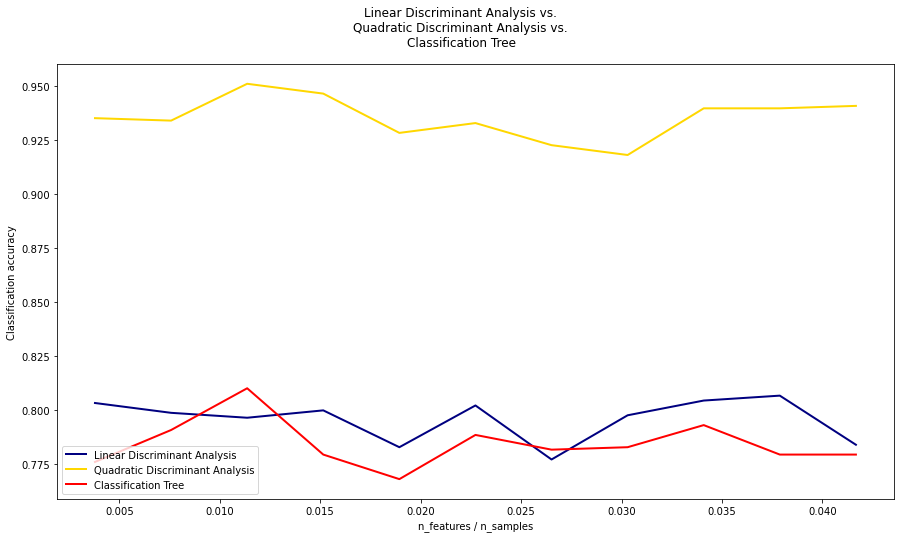

In [443]:
features_samples_ratio = np.array(n_features_range) / n_train
plt.figure(figsize=(15,8))
plt.plot(
    features_samples_ratio,
    acc_clf1,
    linewidth=2,
    label="Linear Discriminant Analysis ",
    color="navy",
)
plt.plot(
    features_samples_ratio,
    acc_clf2,
    linewidth=2,
    label="Quadratic Discriminant Analysis",
    color="gold",
)
plt.plot(
    features_samples_ratio,
    acc_clf3,
    linewidth=2,
    label="Classification Tree",
    color="red",
)

plt.xlabel("n_features / n_samples")
plt.ylabel("Classification accuracy")

plt.legend(loc=3, prop={"size": 10})
plt.suptitle(
    "Linear Discriminant Analysis vs. "
    + "\n"
    + "Quadratic Discriminant Analysis vs. "
    + "\n"
    + "Classification Tree"
)
plt.show()

In [445]:
from sklearn.metrics import balanced_accuracy_score

In [450]:

### Balanced Accuracy

In [449]:
balanced_accuracy_score(res, test_label)

0.9505376344086022

In [458]:
dataset.corr()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,ConvertedTime
q1,1.000000,0.182209,0.305676,0.169927,0.118162,0.251312,0.061591,0.111076,-0.042367,0.018042,-0.158415
q2,0.182209,1.000000,0.190160,0.146096,0.182585,0.118567,0.167169,-0.106530,0.001985,0.078899,0.202683
q3,0.305676,0.190160,1.000000,0.236099,0.144090,0.250631,-0.016444,0.080533,0.046675,0.011831,0.001389
q4,0.169927,0.146096,0.236099,1.000000,0.169411,0.148832,0.226813,0.234489,0.205288,-0.081594,0.218123
q5,0.118162,0.182585,0.144090,0.169411,1.000000,-0.104951,0.102749,-0.023338,-0.025676,-0.050465,0.144225
q6,0.251312,0.118567,0.250631,0.148832,-0.104951,1.000000,0.098179,0.201302,0.137991,-0.006595,0.081685
q7,0.061591,0.167169,-0.016444,0.226813,0.102749,0.098179,1.000000,0.239450,0.313923,-0.054864,0.225209
q8,0.111076,-0.106530,0.080533,0.234489,-0.023338,0.201302,0.239450,1.000000,0.284047,0.157164,-0.015811
q9,-0.042367,0.001985,0.046675,0.205288,-0.025676,0.137991,0.313923,0.284047,1.000000,0.140894,0.133136
q10,0.018042,0.078899,0.011831,-0.081594,-0.050465,-0.006595,-0.054864,0.157164,0.140894,1.000000,-0.022016


<AxesSubplot:>

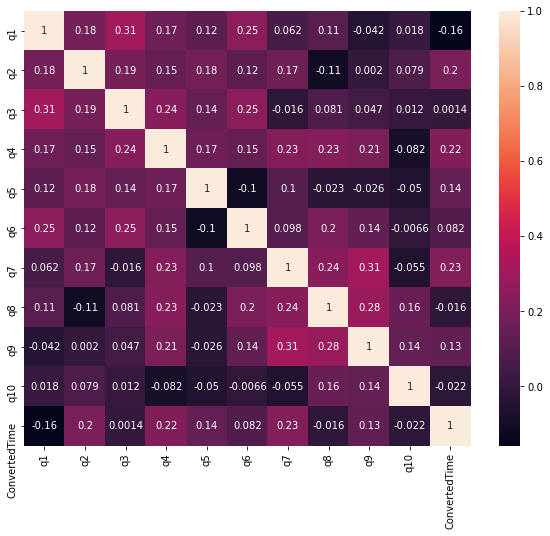

In [460]:
plt.figure(figsize=(10,8))
sb.heatmap(dataset.corr(),annot = True)

In [461]:
from sklearn.metrics import roc_auc_score

In [471]:
roc_auc_score(test_label,QDA.predict_proba(QDA,X=test_data), multi_class='ovr')

TypeError: _decision_function() missing 1 required positional argument: 'X'

In [472]:
from sklearn.linear_model import LogisticRegression

In [473]:
pred = res


In [493]:
roc_auc_score(test_label, clf1.predict_proba(test_data), multi_class='ovr')


0.9607638888888889

## ROC Score

In [494]:
acc_clf1, acc_clf2, acc_clf3 = [], [], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range:
    score_clf1, score_clf2, score_clf3 = 0, 0, 0
    for _ in range(n_averages):
        num  = random.randint(0,999)
        X,testx,y,ypred = train_test_split(data,position,test_size=0.33,random_state = num)

        clf1 = LDA(solver="lsqr", shrinkage=None).fit(X, y)
        clf2 = QDA().fit(X, y)
        clf3 = tree.DecisionTreeClassifier().fit(X, y)

        X, y = testx,ypred
        score_clf1 += roc_auc_score(y, clf1.predict_proba(X), multi_class='ovr')
        score_clf2 += roc_auc_score(y, clf2.predict_proba(X), multi_class='ovr')
        score_clf3 += roc_auc_score(y, clf3.predict_proba(X), multi_class='ovr')

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)
    acc_clf3.append(score_clf3 / n_averages)


/home/haseef/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/haseef/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/haseef/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/haseef/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/haseef/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/haseef/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables ar

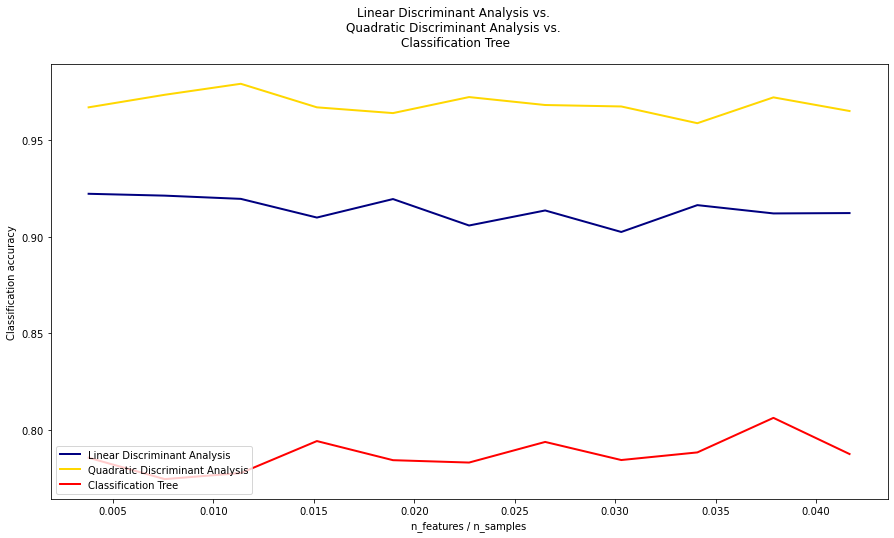

In [495]:
features_samples_ratio = np.array(n_features_range) / n_train
plt.figure(figsize=(15,8))
plt.plot(
    features_samples_ratio,
    acc_clf1,
    linewidth=2,
    label="Linear Discriminant Analysis ",
    color="navy",
)
plt.plot(
    features_samples_ratio,
    acc_clf2,
    linewidth=2,
    label="Quadratic Discriminant Analysis",
    color="gold",
)
plt.plot(
    features_samples_ratio,
    acc_clf3,
    linewidth=2,
    label="Classification Tree",
    color="red",
)

plt.xlabel("n_features / n_samples")
plt.ylabel("Classification accuracy")

plt.legend(loc=3, prop={"size": 10})
plt.suptitle(
    "Linear Discriminant Analysis vs. "
    + "\n"
    + "Quadratic Discriminant Analysis vs. "
    + "\n"
    + "Classification Tree"
)
plt.show()